In [ ]:
!pip install geopandas
!pip install turfpy
!pip install contextily
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving grid2.geojson to grid2 (1).geojson


In [ ]:

import json
import glob
import numpy as np
import math
import folium
from folium import plugins

import io
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 15)
file_name="grid2.geojson"

df_places = gpd.read_file(file_name)
# ax = df_places.plot(color='blue')
df_places

,left,bottom,right,top,geometry
0,77.845,29.866343,77.851667,29.872117,"MULTIPOLYGON (((77.84500 29.86923, 77.84667 29..."
1,77.845,29.872117,77.851667,29.877890,"MULTIPOLYGON (((77.84500 29.87500, 77.84667 29..."
2,77.845,29.877890,77.851667,29.883664,"MULTIPOLYGON (((77.84500 29.88078, 77.84667 29..."
3,77.850,29.869230,77.856667,29.875004,"MULTIPOLYGON (((77.85000 29.87212, 77.85167 29..."
4,77.850,29.875004,77.856667,29.880777,"MULTIPOLYGON (((77.85000 29.87789, 77.85167 29..."
...,...,...,...,...,...
110,77.910,29.880777,77.916667,29.886551,"MULTIPOLYGON (((77.91000 29.88366, 77.91167 29..."
111,77.910,29.886551,77.916667,29.892324,"MULTIPOLYGON (((77.91000 29.88944, 77.91167 29..."
112,77.915,29.866343,77.921667,29.872117,"MULTIPOLYGON (((77.91500 29.86923, 77.91667 29..."
113,77.915,29.877890,77.921667,29.883664,"MULTIPOLYGON (((77.91500 29.88078, 77.91667 29..."


In [ ]:
df_places['hex_id']=range(0,len(df_places))
geojson=json.loads(uploaded[file_name].decode("utf-8"))
from pandas.io.json import json_normalize
df = json_normalize(geojson["features"])

coords = 'geometry.coordinates'

df2 = (df[coords].apply(lambda r: [(i[0],i[1],i[2],i[3],i[4],i[5]) for i in r[0]])
           .apply(pd.Series).stack()
           .reset_index(level=1).rename(columns={0:coords,"level_1":"point"})
           .join(df.drop(coords,1), how='left')).reset_index(level=0)

df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,index,point,geometry.coordinates,type,properties.left,properties.bottom,properties.right,properties.top,geometry.type
0,0,0,"([77.845, 29.86923010305707], [77.846666667443...",Feature,77.845,29.866343,77.851667,29.872117,MultiPolygon
1,1,0,"([77.845, 29.875003608440863], [77.84666666744...",Feature,77.845,29.872117,77.851667,29.877890,MultiPolygon
2,2,0,"([77.845, 29.880777113824657], [77.84666666744...",Feature,77.845,29.877890,77.851667,29.883664,MultiPolygon
3,3,0,"([77.85000000233126, 29.872116855748967], [77....",Feature,77.850,29.869230,77.856667,29.875004,MultiPolygon
4,4,0,"([77.85000000233126, 29.87789036113276], [77.8...",Feature,77.850,29.875004,77.856667,29.880777,MultiPolygon
...,...,...,...,...,...,...,...,...,...
110,110,0,"([77.91000003030626, 29.883663866516557], [77....",Feature,77.910,29.880777,77.916667,29.886551,MultiPolygon
111,111,0,"([77.91000003030626, 29.88943737190035], [77.9...",Feature,77.910,29.886551,77.916667,29.892324,MultiPolygon
112,112,0,"([77.91500003263752, 29.86923010305707], [77.9...",Feature,77.915,29.866343,77.921667,29.872117,MultiPolygon
113,113,0,"([77.91500003263752, 29.880777113824657], [77....",Feature,77.915,29.877890,77.921667,29.883664,MultiPolygon


In [ ]:
#from google.colab import files
#uploaded = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

csv_files=glob.glob('/content/drive/MyDrive/AQIData/2022-03-08/*.json')
from datetime import datetime
from itertools import repeat

for i,file in enumerate(csv_files):
  date_for_file = file.split('_')[-1].split('.')[0]
  date_for_file=date_for_file[:11]+' '+date_for_file[12:]
  date_for_file=date_for_file[:14]+':'+date_for_file[15:]
  date_for_file= pd.to_datetime(date_for_file)
  df = pd.read_csv(file)
  ind=df.shape[0]
  df['Time'] = date_for_file
  df.Time = pd.to_datetime(df.Time, format='%Y-%m-%d %H:%M:%S')
  df['minute'] = df.Time.apply(lambda x: x.hour)*60+df.Time.apply(lambda x: x.minute)
  if i == 0:
   data = pd.DataFrame()
   data = df
  else:
   data = data.append(df)
data.reset_index(inplace = True)

# PM 2.5 Column

for i in enumerate(data):
 pm1 = []
 pm2 =[]
 for j in range(len(data)):
  index = data['realtime'][j].find('PM25')
  val= data['realtime'][j][index+22:index+25]
  pm25 = val.translate({ord(','): None})
  pm1.append(int(pm25))
  index = data['realtime'][j].find('PM10')
  val= data['realtime'][j][index+22:index+25]
  pm10 = val.translate({ord(','): None})
  pm2.append(int(pm10))
 data['PM25'] = pm1
 data['PM 10'] = pm2
result_df=data.sort_values(by='minute')
result_df["hex_id"]=0
result_df=result_df.drop(['devicename','deviceimage','dev_type','dev_category','dev_location_type','location_name','last_updated','timezone','realtime','index','Unnamed: 0','serialNo','hwid','area','city','state','country','pincode'],axis=1)

NameError: ignored

In [ ]:
#finding centroids
centreLat=[]
centreLon=[]
for i in df2.index:
  centreLat.append(float(df2['geometry.coordinates'][i][0][1]+df2['geometry.coordinates'][i][3][1])/2)
  centreLon.append(float(df2['geometry.coordinates'][i][0][0]+df2['geometry.coordinates'][i][3][0])/2)
df_places['LatCen']=centreLat
df_places['LonCen']=centreLon

In [ ]:
from turfpy.measurement import boolean_point_in_polygon
from geojson import Point, Polygon, Feature
for ind in result_df.index:
    x=result_df.loc[ind,"devicelat"]
    y=result_df.loc[ind,"devicelon"]
    z=result_df.loc[ind,"isOnline"]
    if(math.isnan(x) or math.isnan(y)or z==0):
        continue
    
    for j in df2.index:
      point = Feature(geometry=Point((x,y)))
      polygon = Polygon(
          [
          [
            (df2['geometry.coordinates'][j][0][1],df2['geometry.coordinates'][j][0][0]),
            (df2['geometry.coordinates'][j][1][1],df2['geometry.coordinates'][j][1][0]),
            (df2['geometry.coordinates'][j][2][1],df2['geometry.coordinates'][j][2][0]),
            (df2['geometry.coordinates'][j][3][1],df2['geometry.coordinates'][j][3][0]),
            (df2['geometry.coordinates'][j][4][1],df2['geometry.coordinates'][j][4][0]),
            (df2['geometry.coordinates'][j][5][1],df2['geometry.coordinates'][j][5][0]),
            ]
          ])
      if(boolean_point_in_polygon(point,polygon)):
        result_df.loc[ind,"hex_id"]=j
        # r=result_df.loc[ind,"PM25"]
        # pm[j]+=r
        # count[j]+=1

result_df=result_df[result_df["hex_id"]!=0]

In [ ]:
result_df

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
import contextily as cx
def plot_choropleth(timestep):
    # Get subset of dataframe
    df3=result_df[result_df.minute==timestep].set_index('hex_id')
    df4=df3.groupby('hex_id')
    df4=df4.aggregate(np.mean)
    merged = df_places.set_index('hex_id').join(df4)
  
    for ind in merged.index:
      if(math.isnan(merged.loc[ind,"PM25"])):
        merged.loc[ind,"PM25"]=0

    myLon=[]
    myLat=[]
    myPM=[]
    count=0
    for ind in merged.index:
      if(merged.loc[ind,"PM25"]!=0):
        myLat.append(merged.loc[ind,"LatCen"])
        myLon.append(merged.loc[ind,"LonCen"])
        myPM.append(merged.loc[ind,"PM25"])
        count+=1
      
    
    for ind in merged.index:
      if(merged.loc[ind,"PM25"]!=0 or count==0):
        continue
      currLat=merged.loc[ind,"LatCen"]
      currLon=merged.loc[ind,"LonCen"]
      sum=0
      mul=0
      n=len(myLon)
      for i in range(0,n):
        
        distance=(myLon[i]-currLon)*(myLon[i]-currLon)+(myLat[i]-currLat)*(myLat[i]-currLat)
        weight=1/distance
        sum+=weight
        mul+=(weight)*myPM[i]
      
      if(n==1):
        merged.loc[ind,"PM25"]=myPM[0] 
      else:
        merged.loc[ind,"PM25"]=round(mul/sum)
    merged = merged.to_crs(epsg=3857)
    # set the range for the choropleth
    vmin, vmax =0,300
    # create figure and axes for Matplotlib
    norm=plt.Normalize(vmin=vmin,vmax=vmax)
    fig, ax = plt.subplots(1, figsize=(15, 10))
    # create map
    colorlist = ["green", "yellow", "orange", "red","purple"]
    newcmp = LinearSegmentedColormap.from_list('testCmap', colors=colorlist, N=256)
    ax2 = merged.plot(column='PM2.5', 
                      cmap=newcmp, 
                      linewidth=0.1, 
                      ax=ax, 
                      edgecolor='black',
                      norm=norm, 
                      alpha=0.8)
    # add basemap
    cx.add_basemap(ax2, zoom=11,          
                    source=cx.providers.OpenStreetMap.Mapnik)
    # Remove axis labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # add a title
    hour=str(int(timestep/60))
    min=str(int((timestep%60)/10))+str((timestep%60)%10)
    time=hour+":"+min
    ax.set_title('PM 2.5\nTime:- {}'.format(time),
                 fontdict={'fontsize': '20', 'fontweight' : '3'})
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=newcmp,    
                norm=plt.Normalize(vmin=0, vmax=300))
    sm._A = []
    cbar = fig.colorbar(sm)
    return ax, fig
ax, fig = plot_choropleth(854)

NameError: ignored

In [ ]:
!rm -rf viz

KeyboardInterrupt: ignored

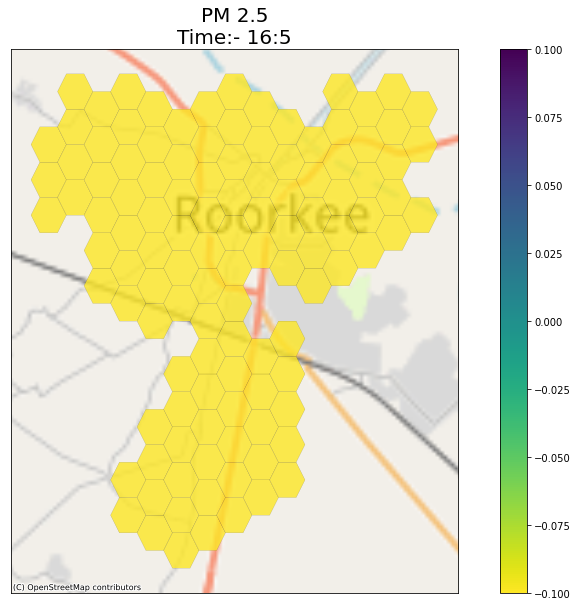

In [ ]:
!mkdir viz
total_timesteps = int(result_df.describe()['minute']['max'])
for i in range(total_timesteps-850):
    ax, fig = plot_choropleth(i+850)
    fig.savefig('./viz/img{:03d}.png'.format(i), 
              dpi=100, format='png',
              bbox_inches='tight')
    plt.close()

In [ ]:
%%bash
cd viz;

# Create mp4 video
ffmpeg -framerate 2 -i img%03d.png -c:v libx264 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" out.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib